<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Urban-electric-aircraft-ML-optimization/blob/main/Prop_ac_Neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/100], Loss: 0.0020
Mean Squared Error: 1.6787
R-squared (R2) Score: 0.9566
Best Input Values - Pitch angle: 23.0, Attack angle: 38.0, Tip length: 7.24, Max Magnitude: 474.0681457519531


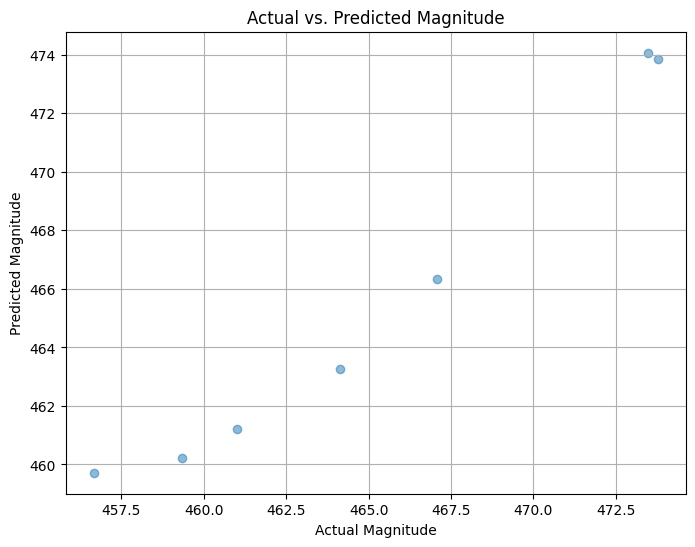

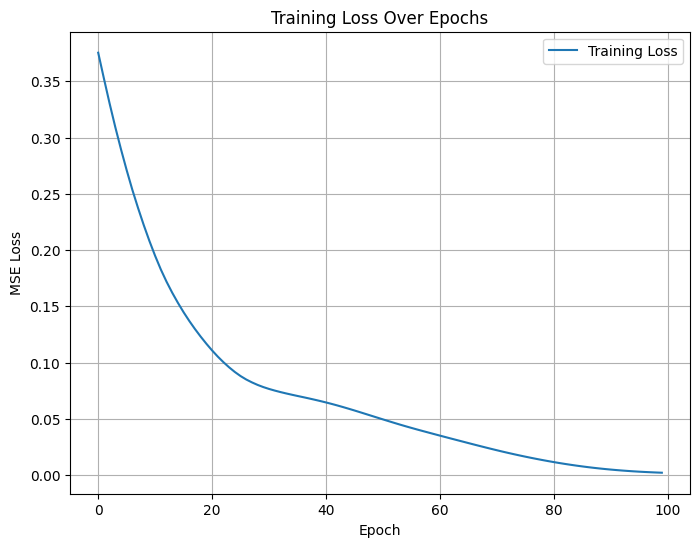

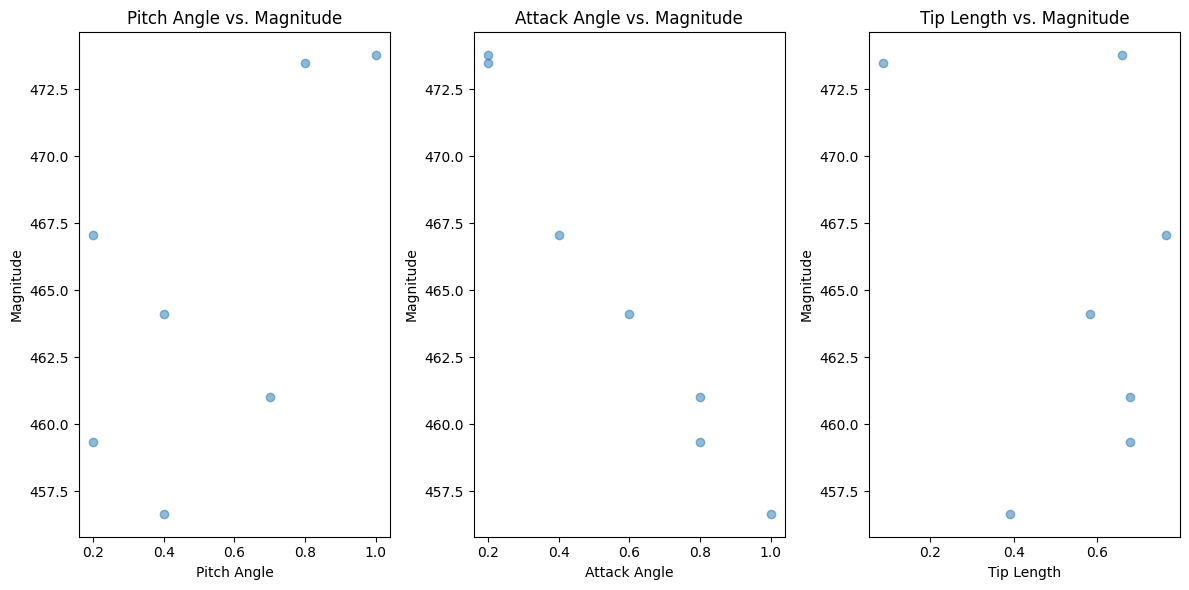

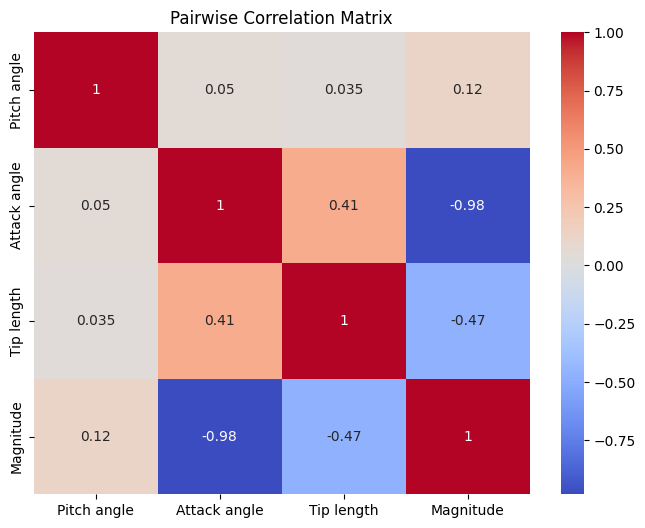

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
filepath = r'/content/Prop set 1 data - Copy.xlsx'
data = pd.read_excel(filepath)

# Define the input and target variables
X = data[['Pitch angle', 'Attack angle', 'Tip length']].values
y = data['Magnitude'].values

# Scale the data to ensure values stay within a range (e.g., [0, 1])
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom neural network
class AerodynamicOptimizer(nn.Module):
    def __init__(self, input_dim):
        super(AerodynamicOptimizer, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model = AerodynamicOptimizer(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing training and validation loss
train_loss_history = []
test_loss_history = []

# Training loop
num_epochs = 100  # You can change this number if needed
for epoch in range(num_epochs):
    inputs = torch.FloatTensor(X_train)
    targets = torch.FloatTensor(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    train_loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    predicted = model(test_inputs)

# Inverse scaling to obtain real values
predicted = scaler_y.inverse_transform(predicted.numpy())
y_test = scaler_y.inverse_transform(y_test)

# Find the input values (Pitch angle, Attack angle, Tip length) corresponding to the max magnitude
max_magnitude_idx = np.argmax(predicted)
best_inputs = scaler_x.inverse_transform(X_test[max_magnitude_idx].reshape(1, -1))

# Visualization: Plot predicted vs. actual Magnitude
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitude')
plt.grid(True)

# Loss visualization
plt.figure(figsize=(8, 6))
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)

# Calculate and print metrics
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Print the input values corresponding to the max magnitude
print(f"Best Input Values - Pitch angle: {best_inputs[0][0]}, Attack angle: {best_inputs[0][1]}, Tip length: {best_inputs[0][2]}, Max Magnitude: {predicted[max_magnitude_idx][0]}")

plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.scatter(X_test[:, 0], y_test, alpha=0.5)
plt.xlabel('Pitch Angle')
plt.ylabel('Magnitude')
plt.title('Pitch Angle vs. Magnitude')

plt.subplot(132)
plt.scatter(X_test[:, 1], y_test, alpha=0.5)
plt.xlabel('Attack Angle')
plt.ylabel('Magnitude')
plt.title('Attack Angle vs. Magnitude')

plt.subplot(133)
plt.scatter(X_test[:, 2], y_test, alpha=0.5)
plt.xlabel('Tip Length')
plt.ylabel('Magnitude')
plt.title('Tip Length vs. Magnitude')

plt.tight_layout()

# Visualization: Pairwise correlation matrix
import seaborn as sns

data_visualization = pd.read_excel(filepath)
corr_matrix = data_visualization.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Matrix')

plt.show()
